In [1]:
# The next step is creating a lattice
# In this case, we'll create a BCC lattice from one of two methods:
# 1. Instantiating a BCC lattice object
# 2. Creating a CompositeNanoObject of three elements in a simple cubic lattice

from ScatterSim.NanoObjects import SphereNanoObject, PolydisperseNanoObject
# We'll import a few lattices, cubic, FCC, BCC and Diamond
from ScatterSim.LatticeObjects import SimpleCubic, FCCLattice, BCCLattice, DiamondTwoParticleLattice
from ScatterSim.CompositeNanoObjects import CompositeNanoObject
# import the peak shape for the peaks, tunable
from ScatterSim.PeakShape import PeakShape

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Let's use our polydisperse sphere nanoobject since it's more realistic
# In general though, you'll want to start with simpler objects to reduce computation time
# but this one should be okay...
pargs_polysphere = dict(radius= 1, sigma_R=.0004)
lattice_spacing = 10. # 10 times radius (1 nm)

# This is an advanced python trick to "freeze in" an object initialization
# this returns a new class where it is assumed the first argument is always "SphereNanoObject"
# when initialized. See the functools library for more cool functional programming tricks
from functools import partial
PolySphereClass = partial(PolydisperseNanoObject,SphereNanoObject)

one_polysphere = PolySphereClass(pargs_polysphere, argname='radius', argstdname='sigma_R')


pargs_sphere1 = {'x0' : 0, 'y0' : 0, 'z0' : 0}
pargs_sphere1.update(pargs_polysphere)
pargs_sphere2 = {'x0' : .5*lattice_spacing, 'y0' : 0.5*lattice_spacing, 'z0' : lattice_spacing}
pargs_sphere2.update(pargs_polysphere)


# inputs are the list of initializer classes, and the defining parameters
two_polyspheres = CompositeNanoObject([PolySphereClass, PolySphereClass], [pargs_sphere1, pargs_sphere2])

In [3]:
# The peak shape
# delta is sigma of a Gaussian, and nu is FWHM of a Lorentzian
# Generally, you'll want to keep one zero and vary the other (to get a Gaussian or Lorentzian)
# but when finalizing a fit, you may want to play with intermediate values
peak = PeakShape(delta=0.03, nu=0.01) 

In [4]:
# now define your lattices
# lattices, to first order are just defined by 6 parameters:
# lattice_spacing_a, lattice_spacing_b and lattice_spacing_c (the unit vector spacings)
# alpha, beta, gamma (the angles the unit vectors make with the axes)
# We'll deal with simple lattices, so all unit vectors are aligned with x, y and z axes, and same length
sigma_D = .06 # add a Debye-Waller factor
lat_bcc = BCCLattice([one_polysphere], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
lat_sc_twospheres = SimpleCubic([two_polyspheres], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)

In [5]:
q = np.linspace(.4, 4, 1000)
# Now compute the intensity, it will take some time...
Z0_bcc = lat_bcc.intensity(q, peak)
Pq_bcc = lat_bcc.form_factor_squared_isotropic(q)
Gq_bcc = lat_bcc.G_q(q)


c_bcc = .1

Sq_bcc = c_bcc*Z0_bcc/Pq_bcc*Gq_bcc + (1-Gq_bcc)

# Now compute the intensity, it will take some time...
Z0_sc_twospheres = lat_sc_twospheres.intensity(q, peak)
Pq_sc_twospheres = lat_sc_twospheres.form_factor_squared_isotropic(q)
Gq_sc_twospheres = lat_sc_twospheres.G_q(q)

c_sc_twospheres = .1

Sq_sc_twospheres = c_sc_twospheres*Z0_sc_twospheres/Pq_sc_twospheres*Gq_sc_twospheres + (1-Gq_sc_twospheres)

# note Gq is same for all three here (just depends on sigma_D, it's an exponential decay...)

print("Finished calculating Simple Cubic")

Finished calculating Simple Cubic


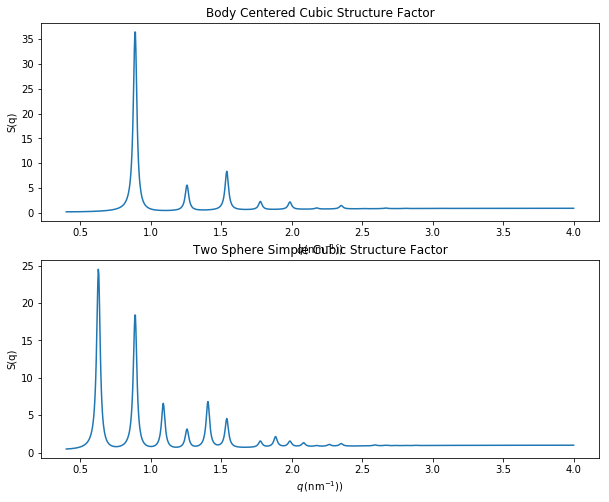

In [6]:
plt.figure(0, figsize=(10,8));plt.clf()
plt.subplot(2,1,1)
plt.title("Body Centered Cubic Structure Factor")
plt.plot(q, Sq_bcc)
plt.xlabel("$q\,(\mathrm{nm}^{-1})$)")
plt.ylabel("S(q)")

plt.subplot(2,1,2)
plt.title("Two Sphere Simple Cubic Structure Factor")
plt.plot(q, Sq_sc_twospheres)
plt.xlabel("$q\,(\mathrm{nm}^{-1})$)")
plt.ylabel("S(q)")

In [7]:
length = 10;
npoints = 100;


In [8]:
[x_bcc,y_bcc,z_bcc] = lat_bcc.projections(length)
[x_sc,y_sc,z_sc] =lat_sc_twospheres.projections(length)

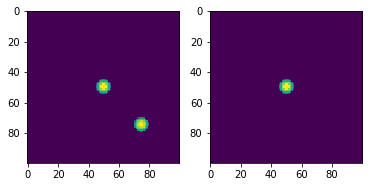

In [9]:
plt.subplot(121)
plt.imshow(x_bcc)
plt.subplot(122)
plt.imshow(y_sc)

In [10]:
np.shape(z)

NameError: name 'z' is not defined

In [ ]:
lat_bcc.to_string()

In [ ]:
plt.imshow(x)

In [ ]:
length = 10
npoints = 100
x = np.linspace(-length, length, npoints)
# ij indexing means that we index in V[x,y,z]
# Note that rightermost index is fastest varying index
x, y, z = np.meshgrid(x,x,x,indexing='ij')
V = octahedron.V(np.array([x,y,z]))

x1 = np.s_[0:100, 0, 0:100]
y1 = np.s_[0,0:100, 0:100]
z1 = np.s_[0:100,0:100,0]

